In [ ]:
#Key Challenge: High readmission rates among patients can impact hospital costs, patient satisfaction, and resource allocation.

#Objective: To analyze key factors contributing to patient readmission and identify potential patterns for better decision-making.

#Goal: Improve hospital resource allocation by understanding the factors that influence readmission rates.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [37]:
df = pd.read_csv('hospital_readmissions.csv' )

df.head(2)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no


In [39]:
#Exploratory Data Analysis
#Check the distribution of the readmission rate:
df['readmitted'].value_counts()

readmitted
no     13246
yes    11754
Name: count, dtype: int64

Hospital X Readmission Rate: 47.02%


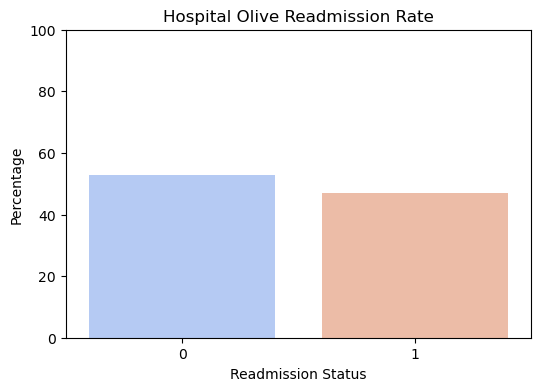

In [41]:
# Convert readmission column to binary (0 = No, 1 = Yes)
df['readmitted'] = df['readmitted'].map({'no': 0, 'yes': 1})

# Calculate Readmission Rate
readmission_rate = df['readmitted'].mean() * 100  # Percentage
print(f"Hospital X Readmission Rate: {readmission_rate:.2f}%")

# Plot Readmission Rate
plt.figure(figsize=(6, 4))
sns.barplot(x=df['readmitted'].value_counts().index, 
            y=df['readmitted'].value_counts(normalize=True) * 100, 
            hue=df['readmitted'].value_counts().index,  # Assigning hue
            palette='coolwarm', 
            legend=False)  # Disable legend if not needed

plt.xlabel("Readmission Status")
plt.ylabel("Percentage")
plt.title("Hospital Olive Readmission Rate")
plt.ylim(0, 100)
plt.show()


Top 2 Age Groups with Highest Readmission Rates:
age
[70-80)    28.381827
[60-70)    23.566445
Name: proportion, dtype: float64


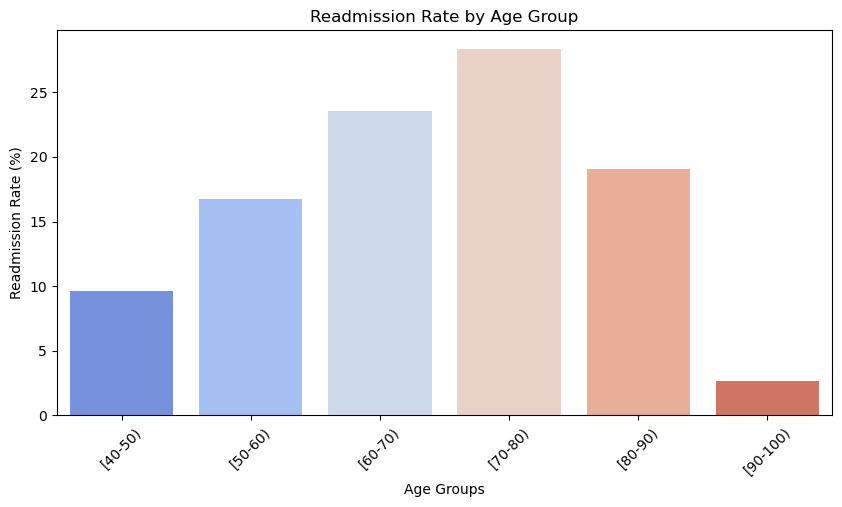

In [45]:
# Mapping Age Groups to Numeric for Sorting
age_mapping = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
    '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
}
df['age_num'] = df['age'].map(age_mapping)

# Readmission Count by Age Group
readmission_by_age = df[df['readmitted'] == 1]['age'].value_counts(normalize=True) * 100
readmission_by_age = readmission_by_age.sort_index()  # Sorting by age

# Top 2 Age Groups
top_2_age_groups = readmission_by_age.nlargest(2)
print("Top 2 Age Groups with Highest Readmission Rates:")
print(top_2_age_groups)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=readmission_by_age.index, 
            y=readmission_by_age.values, 
            hue=readmission_by_age.index,  # Assign hue
            palette="coolwarm", 
            legend=False)  # Hide legend if not needed

plt.xlabel("Age Groups")
plt.ylabel("Readmission Rate (%)")
plt.title("Readmission Rate by Age Group")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


Correlation of Factors with Readmission:
                  Correlation                  Strength
readmitted           1.000000          Perfect Positive
n_inpatient          0.200251             Weak Positive
n_outpatient         0.099301  Very Weak/No Correlation
n_emergency          0.079138  Very Weak/No Correlation
n_lab_procedures     0.037367  Very Weak/No Correlation
age_num              0.019440  Very Weak/No Correlation
n_medications        0.019006  Very Weak/No Correlation


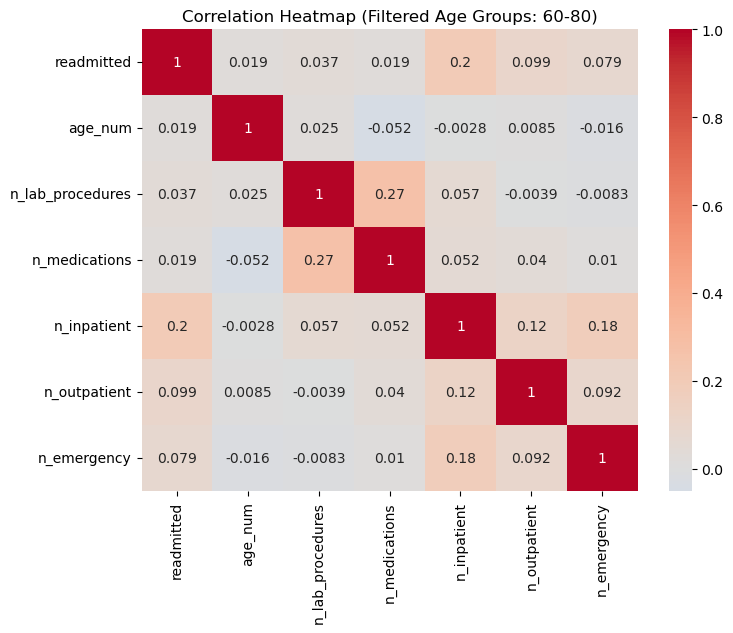

In [55]:
# Filter for top age groups with highest readmission rate
df_filtered = df[df['age'].isin(['[60-70)', '[70-80)'])]

# Select relevant columns for correlation analysis
correlation_data = df_filtered[['readmitted', 'age_num', 'n_lab_procedures', 'n_medications', 'n_inpatient', 'n_outpatient', 'n_emergency']]
correlation_matrix = correlation_data.corr(method='pearson')

# Get correlation with readmission, sorting in descending order
correlation_with_readmission = correlation_matrix['readmitted'].sort_values(ascending=False)

# Define correlation strength labels
def get_correlation_strength(value):
    if value == 1.0:
        return "Perfect Positive"
    elif 0.8 <= value < 1.0:
        return "Strong Positive"
    elif 0.5 <= value < 0.8:
        return "Moderate Positive"
    elif 0.2 <= value < 0.5:
        return "Weak Positive"
    elif 0.0 <= value < 0.2:
        return "Very Weak/No Correlation"
    elif -0.2 <= value < 0.0:
        return "Very Weak Negative"
    elif -0.5 <= value < -0.2:
        return "Weak Negative"
    elif -0.8 <= value < -0.5:
        return "Moderate Negative"
    elif -1.0 <= value < -0.8:
        return "Strong Negative"
    elif value == -1.0:
        return "Perfect Negative"
    else:
        return "Unknown"

# Create a DataFrame with correlation values and labels
correlation_df = pd.DataFrame({
    'Correlation': correlation_with_readmission,
    'Strength': correlation_with_readmission.apply(get_correlation_strength)
})

# Display correlation results
print("Correlation of Factors with Readmission:")
print(correlation_df)

# Heatmap Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Filtered Age Groups: 60-80)")
plt.show()